In [3]:
!pip install catboost
!pip install xgboost
!pip install lightgbm
!pip install mlxtend

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sn

import catboost as cat
import xgboost as xgb
#import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_absolute_error

from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from itertools import cycle
#import cPickle

from os import listdir

from datetime import datetime
import time
pd.set_option("display.max_rows", None)

In [5]:
# First we define the error rate for predictions
def error_rate(model,y_test,X_test):
    """Calculates the error rate for a machine learning classification model given a model, a dataset with all the instances and the predicted value"""
    y_pred = model.predict(X_test)
    #error rate
    error = 1.0 - metrics.accuracy_score(y_test, y_pred)
    return error

#function - training / test for a given m - bagging approach
def train_test_bagging(m, X_app, y_app, X_test, y_test, rdm):
    """Calculates the error rate for a given set of data used in a bagging classifier and a given value of m number of estimators"""
    bag = BaggingClassifier(DecisionTreeClassifier(), n_estimators=m, random_state=rdm)
    bag.fit(X_app,y_app)
    return error_rate(bag, y_test, X_test)
#end train-test

#function - training / test for a given m - bagging approach
def train_test_baggingK(m, X_app, y_app, X_test, y_test, rdm):
    """Calculates the error rate for a given set of data used in a bagging classifier and a given value of m number of estimators"""
    bag = BaggingClassifier(KNeighborsClassifier(), n_estimators=m, random_state=rdm)
    bag.fit(X_app,y_app)
    return error_rate(bag, y_test, X_test)
#end train-test

In [6]:
file_suffix = "_proportional_Dataset4_top15"


#df_training_videos = pd.read_csv("./model/training_videos_attributes2022-01-16_09_59_01.csv")
df_training_videos = pd.read_csv("./model/training_videos_attributes2022-01-11_06_52_14.csv")
print("Number of records (original set):", len(df_training_videos))
df_training_videos.head()

Number of records (original set): 34766


,video,title,duration,view_count,width,height,description_snippet,channel_id,channel_title,published_time,...,nrc_el_negative,nrc_el_positive,nrc_el_sadness,nrc_el_surprise,nrc_el_trust,nrc_el,Flesch,ARI,Flesch.Kincaid,bias
0,N3q-h2knovU,This liberal DA is facing pushback on his plan...,4:16,0,0,0,This liberal DA is facing pushback on his plan...,UCXIJgqnII2ZOINSWNOGFThA,Fox News,9999 days ago,...,0.0,0.0,0.0,0.0,0.0,anger,119.190000,-13.650000,-2.620000,R
1,aPmYO9ZF12M,Gingrich: Americans sense that our best days a...,5:43,0,0,0,Gingrich: Americans sense that our best days a...,UCXIJgqnII2ZOINSWNOGFThA,Fox News,9999 days ago,...,27.0,42.0,17.0,9.0,23.0,positive,-954.208488,511.568839,400.990829,R
2,TBq6hKlHubE,Teachers union hit with lawsuit over school cl...,4:10,0,0,0,Teachers union hit with lawsuit over school cl...,UCXIJgqnII2ZOINSWNOGFThA,Fox News,9999 days ago,...,0.0,0.0,0.0,0.0,0.0,anger,NaN,NaN,NaN,R
3,SexfFbs0MZ8,These are the big liars: Steve Hilton,9:39,0,0,0,These are the big liars: Steve Hilton,UCXIJgqnII2ZOINSWNOGFThA,Fox News,9999 days ago,...,0.0,0.0,0.0,0.0,0.0,anger,120.205000,-13.365000,-3.010000,R
4,3oGRmQm-STc,Gowdy: This is anti-democratic,3:06,0,0,0,Gowdy: This is anti-democratic,UCXIJgqnII2ZOINSWNOGFThA,Fox News,9999 days ago,...,0.0,0.0,0.0,0.0,0.0,anger,118.175000,-12.365000,-2.230000,R


In [7]:
df_training_videos = df_training_videos[pd.notnull(df_training_videos["bias"])]
df_training_videos = df_training_videos[df_training_videos["length"] > 0]
df_training_videos.dropna(subset=["Flesch"], inplace=True)
print("Number of records with known bias (original set):", len(df_training_videos))

Number of records with known bias (original set): 15079


In [8]:
df_training_videos.bias.value_counts()

LC    8830
C     2957
RC    1693
L     1366
R      233
Name: bias, dtype: int64

In [9]:
df_training_videos.loc[df_training_videos["bias"]=="L", "bias_num"] = 1
df_training_videos.loc[df_training_videos["bias"]=="LC", "bias_num"] = 2
df_training_videos.loc[df_training_videos["bias"]=="C", "bias_num"] = 3
df_training_videos.loc[df_training_videos["bias"]=="RC", "bias_num"] = 4
df_training_videos.loc[df_training_videos["bias"]=="R", "bias_num"] = 5

In [10]:
df_training_videos["lsd_count"] = df_training_videos["lsd_negative"] + df_training_videos["lsd_positive"]
df_training_videos["lsd_pct"] = df_training_videos["lsd_count"] / df_training_videos["length"]

df_training_videos["afinn_count"] = df_training_videos["afinn_negative"] + df_training_videos["afinn_positive"]
df_training_videos["afinn_pct"] = df_training_videos["afinn_count"] / df_training_videos["length"]

df_training_videos["geninqposneg_count"] = df_training_videos["geninqposneg_negative"] + df_training_videos["geninqposneg_positive"]
df_training_videos["geninqposneg_pct"] = df_training_videos["geninqposneg_count"] / df_training_videos["length"]

df_training_videos["huliu_count"] = df_training_videos["huliu_negative"] + df_training_videos["huliu_positive"]
df_training_videos["huliu_pct"] = df_training_videos["huliu_count"] / df_training_videos["length"]

df_training_videos["lm_count"] = df_training_videos["lm_negative"] + df_training_videos["lm_positive"] + df_training_videos["lm_uncertainty"] + df_training_videos["lm_litigious"] + df_training_videos["lm_constraining"] + df_training_videos["lm_superfluous"] + df_training_videos["lm_interesting"] + df_training_videos["lm_modal_words_strong"]
df_training_videos["lm_pct"] = df_training_videos["lm_count"] / df_training_videos["length"]

df_training_videos.loc[df_training_videos["lm_count"] == 0, "lm_negative_pct"] = 0
df_training_videos.loc[df_training_videos["lm_count"] == 0, "lm_positive_pct"] = 0
df_training_videos.loc[df_training_videos["lm_count"] == 0, "lm_uncertainty_pct"] = 0
df_training_videos.loc[df_training_videos["lm_count"] == 0, "lm_litigious_pct"] = 0
df_training_videos.loc[df_training_videos["lm_count"] == 0, "lm_constraining_pct"] = 0
df_training_videos.loc[df_training_videos["lm_count"] == 0, "lm_superfluous_pct"] = 0
df_training_videos.loc[df_training_videos["lm_count"] == 0, "lm_interesting_pct"] = 0
df_training_videos.loc[df_training_videos["lm_count"] == 0, "lm_modal_words_strong_pct"] = 0

df_training_videos.loc[df_training_videos["lm_count"] > 0, "lm_negative_pct"] = df_training_videos["lm_negative"] / df_training_videos["lm_count"]
df_training_videos.loc[df_training_videos["lm_count"] > 0, "lm_positive_pct"] = df_training_videos["lm_positive"] / df_training_videos["lm_count"]
df_training_videos.loc[df_training_videos["lm_count"] > 0, "lm_uncertainty_pct"] = df_training_videos["lm_uncertainty"] / df_training_videos["lm_count"]
df_training_videos.loc[df_training_videos["lm_count"] > 0, "lm_litigious_pct"] = df_training_videos["lm_litigious"] / df_training_videos["lm_count"]
df_training_videos.loc[df_training_videos["lm_count"] > 0, "lm_constraining_pct"] = df_training_videos["lm_constraining"] / df_training_videos["lm_count"]
df_training_videos.loc[df_training_videos["lm_count"] > 0, "lm_superfluous_pct"] = df_training_videos["lm_superfluous"] / df_training_videos["lm_count"]
df_training_videos.loc[df_training_videos["lm_count"] > 0, "lm_interesting_pct"] = df_training_videos["lm_interesting"] / df_training_videos["lm_count"]
df_training_videos.loc[df_training_videos["lm_count"] > 0, "lm_modal_words_strong_pct"] = df_training_videos["lm_modal_words_strong"] / df_training_videos["lm_count"]

df_training_videos["lgpp_count"] = df_training_videos["lgpp_culture"] + df_training_videos["lgpp_economy"] + df_training_videos["lgpp_environment"] + df_training_videos["lgpp_groups"] + df_training_videos["lgpp_institutions"] + df_training_videos["lgpp_law_and_order"] + df_training_videos["lgpp_rural"] + df_training_videos["lgpp_urban"] + df_training_videos["lgpp_values"]
df_training_videos["lgpp_pct"] = df_training_videos["lgpp_count"] / df_training_videos["length"]

df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_culture_pct"] = 0
df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_economy_pct"] = 0
df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_environment_pct"] = 0
df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_groups_pct"] = 0
df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_institutions_pct"] = 0
df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_law_and_order_pct"] = 0
df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_rural_pct"] = 0
df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_urban_pct"] = 0
df_training_videos.loc[df_training_videos["lgpp_count"] == 0, "lgpp_values_pct"] = 0

df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_culture_pct"] = df_training_videos["lgpp_culture"] / df_training_videos["lgpp_count"]
df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_economy_pct"] = df_training_videos["lgpp_economy"] / df_training_videos["lgpp_count"]
df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_environment_pct"] = df_training_videos["lgpp_environment"] / df_training_videos["lgpp_count"]
df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_groups_pct"] = df_training_videos["lgpp_groups"] / df_training_videos["lgpp_count"]
df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_institutions_pct"] = df_training_videos["lgpp_institutions"] / df_training_videos["lgpp_count"]
df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_law_and_order_pct"] = df_training_videos["lgpp_law_and_order"] / df_training_videos["lgpp_count"]
df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_rural_pct"] = df_training_videos["lgpp_rural"] / df_training_videos["lgpp_count"]
df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_urban_pct"] = df_training_videos["lgpp_urban"] / df_training_videos["lgpp_count"]
df_training_videos.loc[df_training_videos["lgpp_count"] > 0, "lgpp_values_pct"] = df_training_videos["lgpp_values"] / df_training_videos["lgpp_count"]

df_training_videos["nrc_el_count"] = df_training_videos["nrc_el_anger"] + df_training_videos["nrc_el_anticipation"] + df_training_videos["nrc_el_disgust"] + df_training_videos["nrc_el_fear"] + df_training_videos["nrc_el_joy"] + df_training_videos["nrc_el_negative"] + df_training_videos["nrc_el_positive"] + df_training_videos["nrc_el_sadness"] + df_training_videos["nrc_el_surprise"] + df_training_videos["nrc_el_trust"]
df_training_videos["nrc_el_pct"] = df_training_videos["nrc_el_count"] / df_training_videos["length"]

df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_anger_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_anticipation_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_disgust_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_fear_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_joy_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_negative_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_positive_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_sadness_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_surprise_pct"] = 0
df_training_videos.loc[df_training_videos["nrc_el_count"] == 0, "nrc_el_trust_pct"] = 0

df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_anger_pct"] = df_training_videos["nrc_el_anger"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_anticipation_pct"] = df_training_videos["nrc_el_anticipation"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_disgust_pct"] = df_training_videos["nrc_el_disgust"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_fear_pct"] = df_training_videos["nrc_el_fear"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_joy_pct"] = df_training_videos["nrc_el_joy"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_negative_pct"] = df_training_videos["nrc_el_negative"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_positive_pct"] = df_training_videos["nrc_el_positive"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_sadness_pct"] = df_training_videos["nrc_el_sadness"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_surprise_pct"] = df_training_videos["nrc_el_surprise"] / df_training_videos["nrc_el_count"]
df_training_videos.loc[df_training_videos["nrc_el_count"] > 0, "nrc_el_trust_pct"] = df_training_videos["nrc_el_trust"] / df_training_videos["nrc_el_count"]

In [11]:
# Creation of modelling datasets

df_training_videos_l = df_training_videos[df_training_videos["bias"] == "L"]
df_training_videos_cl = df_training_videos[df_training_videos["bias"] == "LC"]
df_training_videos_c = df_training_videos[df_training_videos["bias"] == "C"]
df_training_videos_cr = df_training_videos[df_training_videos["bias"] == "RC"]
df_training_videos_r = df_training_videos[df_training_videos["bias"] == "R"]

# Creation of a dataset based on the class with the least instances

l_videos = 40000
cl_videos = 40000
c_videos = 40000
cr_videos = 40000
r_videos = 40000

df_training_videos_0 = df_training_videos_l.sample(n = min(l_videos, len(df_training_videos_l))) # The df on the left is numbered "1" (one) while the one on the right is "l" (the letter l, for left)
df_training_videos_0 = df_training_videos_0.append(df_training_videos_cl.sample(n = min(cl_videos, len(df_training_videos_cl))))
df_training_videos_0 = df_training_videos_0.append(df_training_videos_c.sample(n = min(c_videos, len(df_training_videos_c))))
df_training_videos_0 = df_training_videos_0.append(df_training_videos_cr.sample(n = min(cr_videos, len(df_training_videos_cr))))
df_training_videos_0 = df_training_videos_0.append(df_training_videos_r.sample(n = min(r_videos, len(df_training_videos_r))))

In [12]:
df_training_videos_0.bias.value_counts()

LC    8830
C     2957
RC    1693
L     1366
R      233
Name: bias, dtype: int64

In [13]:
date = time.strftime("%Y-%m-%d_%H_%M_%S")
file_name = "model/training_videos_0" + file_suffix+ date + ".csv"
df_training_videos_0.to_csv(file_name, index=False)

In [14]:
df_training_videos_0 = df_training_videos_0[df_training_videos_0.columns[62:]].drop("bias", axis = 1)

In [15]:
df_training_videos_0.columns

Index(['Flesch', 'ARI', 'Flesch.Kincaid', 'bias_num', 'lsd_count', 'lsd_pct',
       'afinn_count', 'afinn_pct', 'geninqposneg_count', 'geninqposneg_pct',
       'huliu_count', 'huliu_pct', 'lm_count', 'lm_pct', 'lm_negative_pct',
       'lm_positive_pct', 'lm_uncertainty_pct', 'lm_litigious_pct',
       'lm_constraining_pct', 'lm_superfluous_pct', 'lm_interesting_pct',
       'lm_modal_words_strong_pct', 'lgpp_count', 'lgpp_pct',
       'lgpp_culture_pct', 'lgpp_economy_pct', 'lgpp_environment_pct',
       'lgpp_groups_pct', 'lgpp_institutions_pct', 'lgpp_law_and_order_pct',
       'lgpp_rural_pct', 'lgpp_urban_pct', 'lgpp_values_pct', 'nrc_el_count',
       'nrc_el_pct', 'nrc_el_anger_pct', 'nrc_el_anticipation_pct',
       'nrc_el_disgust_pct', 'nrc_el_fear_pct', 'nrc_el_joy_pct',
       'nrc_el_negative_pct', 'nrc_el_positive_pct', 'nrc_el_sadness_pct',
       'nrc_el_surprise_pct', 'nrc_el_trust_pct'],
      dtype='object')

In [16]:
bias_col = df_training_videos_0.pop("bias_num")
df_training_videos_0.insert(0, "bias_num", bias_col)

In [17]:
seed = 47

In [18]:
df_training_videos_num_i = df_training_videos_0

In [19]:
X = df_training_videos_num_i.to_numpy()[:,1:]
y = df_training_videos_num_i.to_numpy()[:,0].astype('int')

,Flesch,ARI,Flesch.Kincaid,lsd_count,lsd_pct,afinn_count,afinn_pct,geninqposneg_count,geninqposneg_pct,huliu_count,...,nrc_el_anger_pct,nrc_el_anticipation_pct,nrc_el_disgust_pct,nrc_el_fear_pct,nrc_el_joy_pct,nrc_el_negative_pct,nrc_el_positive_pct,nrc_el_sadness_pct,nrc_el_surprise_pct,nrc_el_trust_pct
Flesch,1.000000,-0.999991,-0.999992,-0.613486,0.024193,-0.599027,0.013765,-0.617054,-0.109164,-0.594393,...,-0.046370,0.026347,-0.006459,-0.019407,0.028467,0.006648,-0.046490,0.010732,0.081041,-0.082492
ARI,-0.999991,1.000000,1.000000,0.613544,-0.024179,0.599289,-0.012932,0.617316,0.110579,0.594567,...,0.046153,-0.025672,0.006582,0.018741,-0.027187,-0.007171,0.046221,-0.010891,-0.080139,0.082219
Flesch.Kincaid,-0.999992,1.000000,1.000000,0.613542,-0.024358,0.599268,-0.013107,0.617299,0.110269,0.594552,...,0.046091,-0.025853,0.006498,0.018695,-0.027336,-0.007239,0.046170,-0.010910,-0.080320,0.082148
lsd_count,-0.613486,0.613544,0.613542,1.000000,0.031216,0.982898,0.022753,0.978118,0.120921,0.988188,...,0.041371,-0.000416,0.043686,0.002494,-0.027003,0.015218,0.040701,-0.036948,-0.047184,0.065565
lsd_pct,0.024193,-0.024179,-0.024358,0.031216,1.000000,0.018054,0.738983,-0.037276,0.559137,0.008717,...,0.211068,-0.139763,0.213272,0.137736,0.140827,0.136076,-0.172864,0.120318,0.133823,-0.081467
afinn_count,-0.599027,0.599289,0.599268,0.982898,0.018054,1.000000,0.073582,0.980626,0.158587,0.985156,...,0.029029,0.014878,0.034822,-0.020126,0.017979,-0.008816,0.036878,-0.038726,-0.027599,0.060152
afinn_pct,0.013765,-0.012932,-0.013107,0.022753,0.738983,0.073582,1.000000,0.001539,0.646023,0.028567,...,0.115721,-0.087093,0.126846,0.013261,0.305076,-0.027831,-0.160314,0.097257,0.202150,-0.090642
geninqposneg_count,-0.617054,0.617316,0.617299,0.978118,-0.037276,0.980626,0.001539,1.000000,0.153680,0.980540,...,0.006351,0.032384,0.012805,-0.038247,0.006589,-0.020496,0.067412,-0.055092,-0.030963,0.081142
geninqposneg_pct,-0.109164,0.110579,0.110269,0.120921,0.559137,0.158587,0.646023,0.153680,1.000000,0.134790,...,0.015685,0.045603,0.053927,-0.109051,0.386036,-0.055763,-0.013656,0.025951,0.268254,-0.014991
huliu_count,-0.594393,0.594567,0.594552,0.988188,0.008717,0.985156,0.028567,0.980540,0.134790,1.000000,...,0.030513,0.010721,0.048181,-0.016863,-0.009116,0.011720,0.040114,-0.036592,-0.034139,0.056518


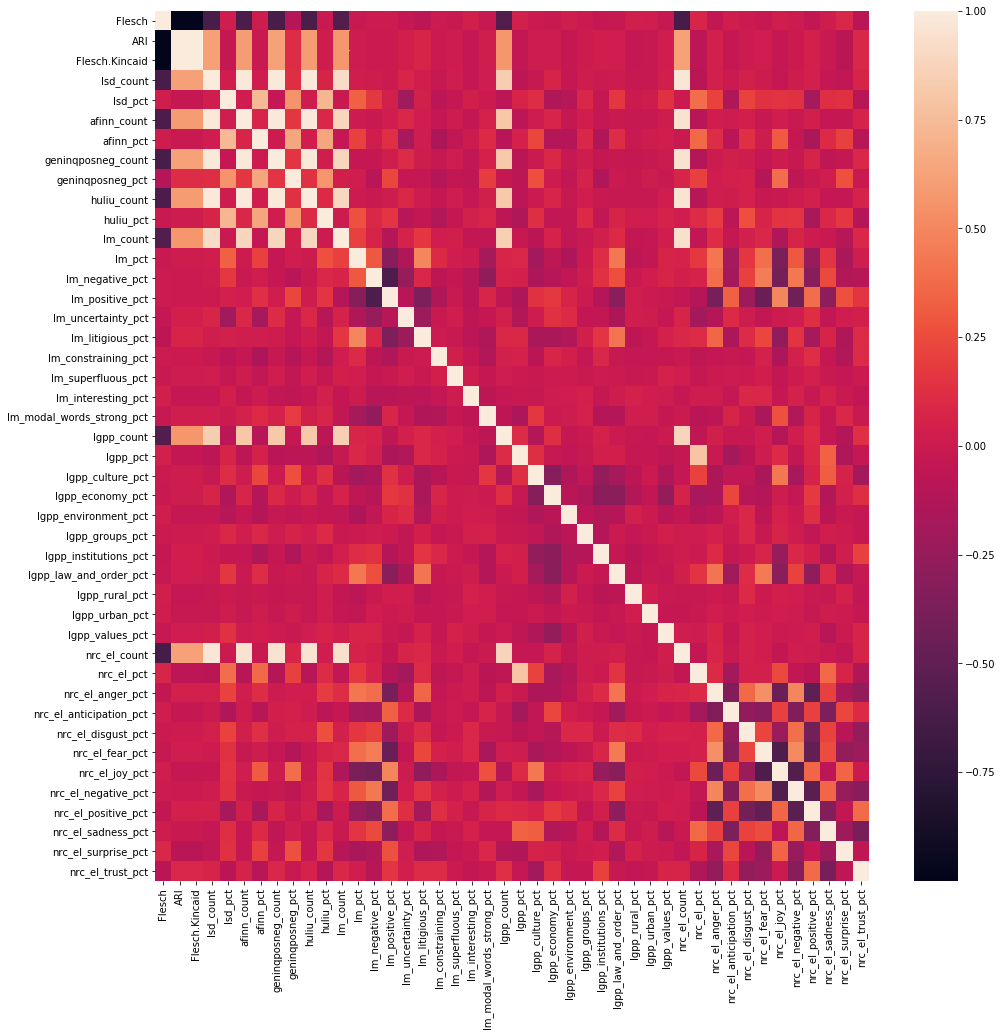

In [20]:
plt.figure(figsize=(16, 16))
sn.heatmap(df_training_videos_num_i.iloc[:,1:].corr())
df_training_videos_num_i.iloc[:,1:].corr()

,Flesch,lsd_count,lsd_pct,lm_pct,lm_negative_pct,lm_positive_pct,lm_uncertainty_pct,lm_litigious_pct,lm_constraining_pct,lm_superfluous_pct,...,nrc_el_anger_pct,nrc_el_anticipation_pct,nrc_el_disgust_pct,nrc_el_fear_pct,nrc_el_joy_pct,nrc_el_negative_pct,nrc_el_positive_pct,nrc_el_sadness_pct,nrc_el_surprise_pct,nrc_el_trust_pct
Flesch,1.000000,-0.613486,0.024193,-0.011832,0.002940,0.001551,-0.031801,-0.065752,0.006439,-0.013561,...,-0.046370,0.026347,-0.006459,-0.019407,0.028467,0.006648,-0.046490,0.010732,0.081041,-0.082492
lsd_count,-0.613486,1.000000,0.031216,0.023757,0.009952,-0.004122,0.077819,0.029445,-0.016587,0.021552,...,0.041371,-0.000416,0.043686,0.002494,-0.027003,0.015218,0.040701,-0.036948,-0.047184,0.065565
lsd_pct,0.024193,0.031216,1.000000,0.331809,0.164393,0.041777,-0.198440,0.045704,-0.072841,-0.028701,...,0.211068,-0.139763,0.213272,0.137736,0.140827,0.136076,-0.172864,0.120318,0.133823,-0.081467
lm_pct,-0.011832,0.023757,0.331809,1.000000,0.303722,-0.316068,-0.127638,0.498659,0.098491,0.018010,...,0.424214,-0.172136,0.157886,0.395859,-0.371916,0.303429,-0.241153,0.152311,-0.152489,0.026885
lm_negative_pct,0.002940,0.009952,0.164393,0.303722,1.000000,-0.593630,-0.249437,0.085793,-0.063716,-0.027263,...,0.389750,-0.184652,0.202573,0.457824,-0.405401,0.435543,-0.317375,0.239116,-0.124531,-0.097956
lm_positive_pct,0.001551,-0.004122,0.041777,-0.316068,-0.593630,1.000000,-0.091713,-0.364398,-0.127391,-0.009027,...,-0.391040,0.331343,-0.211672,-0.456200,0.495379,-0.422136,0.389869,-0.282224,0.266059,0.152607
lm_uncertainty_pct,-0.031801,0.077819,-0.198440,-0.127638,-0.249437,-0.091713,1.000000,-0.223164,-0.011272,0.022224,...,-0.108872,0.095071,0.011865,-0.040734,0.002447,0.020121,0.120857,-0.053375,0.016956,0.036497
lm_litigious_pct,-0.065752,0.029445,0.045704,0.498659,0.085793,-0.364398,-0.223164,1.000000,0.002416,-0.014168,...,0.355226,-0.147058,0.104388,0.228286,-0.266243,0.145097,-0.179540,0.067782,-0.132599,0.108093
lm_constraining_pct,0.006439,-0.016587,-0.072841,0.098491,-0.063716,-0.127391,-0.011272,0.002416,1.000000,0.033442,...,-0.034795,-0.021869,-0.033650,0.048914,-0.147908,0.045801,0.119688,-0.028146,-0.123072,0.109306
lm_superfluous_pct,-0.013561,0.021552,-0.028701,0.018010,-0.027263,-0.009027,0.022224,-0.014168,0.033442,1.000000,...,-0.004581,0.002687,-0.006767,0.028094,-0.041196,0.006339,0.046666,-0.010438,-0.035898,-0.007079


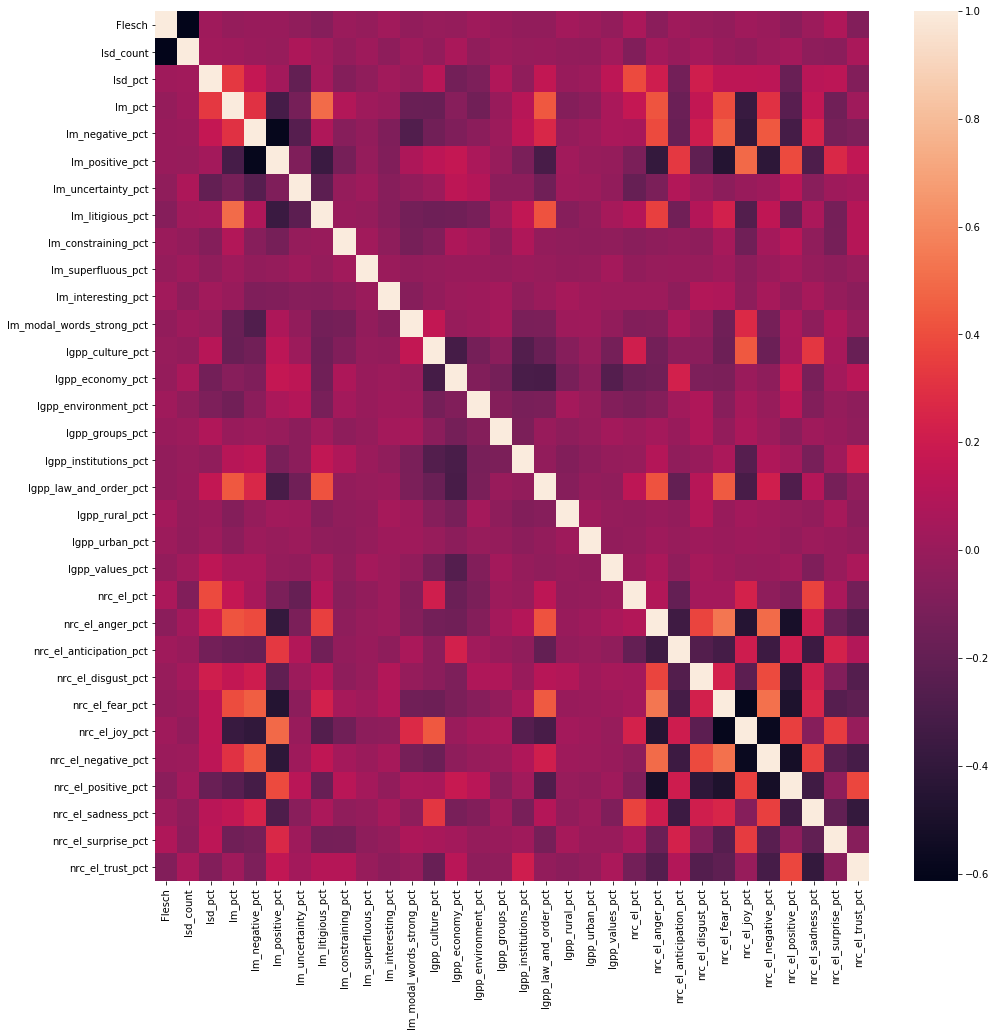

In [21]:
feature_drop = ["ARI", "Flesch.Kincaid", "afinn_count", "geninqposneg_count", "huliu_count", "lm_count", "lgpp_count", "nrc_el_count", "lgpp_pct", "afinn_pct", "geninqposneg_pct", "huliu_pct"]
df_training_videos_num_i = df_training_videos_num_i.drop(feature_drop, axis = 1)
plt.figure(figsize=(16, 16))
sn.heatmap(df_training_videos_num_i.iloc[:,1:].corr())
df_training_videos_num_i.iloc[:,1:].corr()

In [22]:
X = df_training_videos_num_i.to_numpy()[:, 1:]
y = df_training_videos_num_i.to_numpy()[:, 0].astype('int')

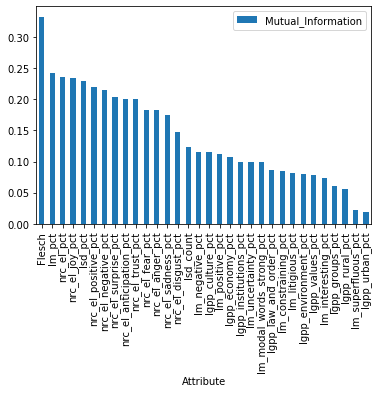

,Attribute,Mutual_Information
0,Flesch,0.332469
3,lm_pct,0.241610
21,nrc_el_pct,0.236124
26,nrc_el_joy_pct,0.233451
2,lsd_pct,0.228785
28,nrc_el_positive_pct,0.219504
27,nrc_el_negative_pct,0.215254
30,nrc_el_surprise_pct,0.203253
23,nrc_el_anticipation_pct,0.200205
31,nrc_el_trust_pct,0.200080


In [23]:
X = df_training_videos_num_i.to_numpy()[:,1:]
y = df_training_videos_num_i.to_numpy()[:,0].astype('int')
mic = mutual_info_classif(X, y, random_state=seed)
columns = df_training_videos_num_i.columns[1:]
mic_df = pd.DataFrame({'Attribute':df_training_videos_num_i.columns[1:], 'Mutual_Information':mic}).sort_values(by="Mutual_Information", ascending=False)
mic_df.plot('Attribute', 'Mutual_Information', kind='bar')
plt.show()
mic_df

In [24]:
feature_drop = ["lsd_count", "lm_positive_pct", "lgpp_culture_pct", "lgpp_economy_pct", "lgpp_institutions_pct", "lm_modal_words_strong_pct", "lm_uncertainty_pct", "lm_litigious_pct", "lgpp_law_and_order_pct", "lm_constraining_pct", "lgpp_values_pct", "lgpp_environment_pct", "lm_interesting_pct", "lgpp_groups_pct", "lgpp_rural_pct", "lm_superfluous_pct", "lgpp_urban_pct"]
df_training_videos_num_i = df_training_videos_num_i.drop(feature_drop, axis = 1)
X = df_training_videos_num_i.to_numpy()[:, 1:]
y = df_training_videos_num_i.to_numpy()[:, 0].astype('int')

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN

In [25]:
knn_start = time.strftime("%Y-%m-%d_%H_%M_%S")

In [26]:
parametres = [{"n_neighbors":[10, 20, 30, 40, 50, 60]}]
grid_knn = GridSearchCV(cv = 10, estimator=KNeighborsClassifier(), param_grid=parametres, scoring="accuracy", verbose = True)
grille_knn = grid_knn.fit(X_train, y_train)

best_estimators_knn = grille_knn.best_params_["n_neighbors"]
print("Best neighbors: ", best_estimators_knn)

best_score_knn = grille_knn.best_score_
print("Best score: ", best_score_knn)

knn = KNeighborsClassifier(n_neighbors=best_estimators_knn)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)

print("Random Forest Accuracy: ", knn_accuracy)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   22.8s finished


Best neighbors:  10
Best score:  0.6356615843730807
Random Forest Accuracy:  0.6438992042440318


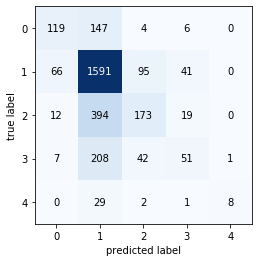

In [27]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_knn))
plt.show()

In [28]:
y_test_b = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
y_pred_b = label_binarize(y_pred_knn, classes=[1, 2, 3, 4, 5])
n_classes = y_test_b.shape[1]

knn_accuracy = metrics.accuracy_score(y_test_b, y_pred_b)

print("Accuracy: ", knn_accuracy)

Accuracy:  0.6438992042440318


In [29]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_b[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

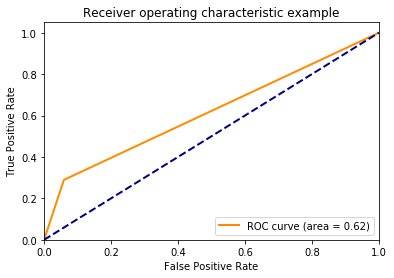

In [30]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

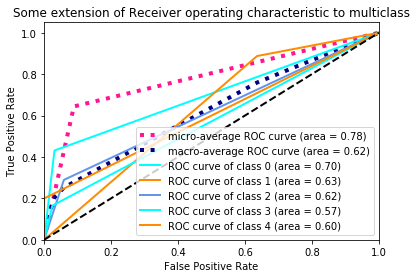

In [31]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [32]:
knn_end = time.strftime("%Y-%m-%d_%H_%M_%S")

In [73]:
print("Start time: ", knn_start)
print("")
print("")
print("**** KNN ****")
print("")
print("Best Estimators: ", best_estimators_knn)
print("Accuracy: %.2f" % knn_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_knn, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_knn, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_knn, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_knn)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_knn))
print("Elapsed: %.2f" % (abs(datetime.strptime(knn_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(knn_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))

print("End time: ", knn_end)

Start time:  2022-01-29_15_44_32


**** KNN ****

Best Estimators:  10
Accuracy: 0.64
F1 Scode micro: 0.64
F1 Scode macro: 0.44
F1 Scode weighted: 0.60
precision: [0.58333333 0.67159139 0.54746835 0.43220339 0.88888889]
recall: [0.43115942 0.88733965 0.28929766 0.16504854 0.2       ]
fscore: [0.49583333 0.76453628 0.3785558  0.23887588 0.32653061]
support: [ 276 1793  598  309   40]
MEA: 0.47
Elapsed: 0.42
End time:  2022-01-29_15_44_57


## Gaussian Naive Bayes

In [50]:
gnb_start = time.strftime("%Y-%m-%d_%H_%M_%S")

In [51]:
#parametres = [{"n_neighbors":[10, 20, 30, 40, 50, 60]}]
#grid_gnb = GridSearchCV(cv = 10, estimator=KNeighborsClassifier(), param_grid=parametres, scoring="accuracy", verbose = True)

#grille_gnb = grid_gnb.fit(X_train, y_train)

#best_estimators_gnb = grille_gnb.best_params_["n_neighbors"]
#print("Best neighbors: ", best_estimators_gnb)

#best_score_gnb = grille_gnb.best_score_
#print("Best score: ", best_score_gnb)

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)

gnb_accuracy = metrics.accuracy_score(y_test, y_pred_gnb)

print("Gaussian Naïve Bayes Accuracy: ", gnb_accuracy)

Gaussian Naïve Bayes Accuracy:  0.5377984084880637


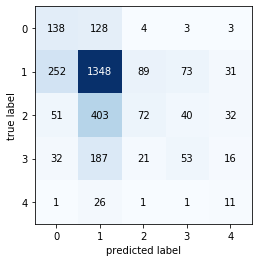

In [52]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_gnb))
plt.show()

In [53]:
y_test_b = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
y_pred_b = label_binarize(y_pred_gnb, classes=[1, 2, 3, 4, 5])
n_classes = y_test_b.shape[1]

gnb_accuracy = metrics.accuracy_score(y_test_b, y_pred_b)

print("Accuracy: ", gnb_accuracy)

Accuracy:  0.5377984084880637


In [54]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_b[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

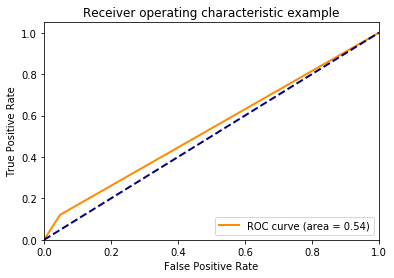

In [55]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

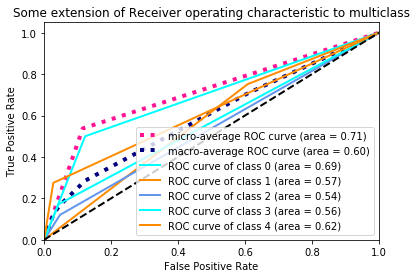

In [56]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [57]:
gnb_end = time.strftime("%Y-%m-%d_%H_%M_%S")

In [74]:
print("Start time: ", gnb_start)

print("")
print("")
print("**** Gaussian Naive Bayes ****")
print("")
print("Accuracy: %.2f" % gnb_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_gnb, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_gnb, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_gnb, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_gnb)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_gnb))
print("Elapsed: %.2f" % (abs(datetime.strptime(gnb_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(gnb_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))
print("End time: ", gnb_end)

Start time:  2022-01-29_16_04_20


**** Gaussian Naive Bayes ****

Accuracy: 0.54
F1 Scode micro: 0.54
F1 Scode macro: 0.33
F1 Scode weighted: 0.51
precision: [0.29113924 0.64435946 0.38502674 0.31176471 0.11827957]
recall: [0.5        0.7518126  0.12040134 0.17152104 0.275     ]
fscore: [0.368      0.69395109 0.18343949 0.22129436 0.16541353]
support: [ 276 1793  598  309   40]
MEA: 0.64
Elapsed: 0.10
End time:  2022-01-29_16_04_26


##  Random Forest

In [58]:
rf_start = time.strftime("%Y-%m-%d_%H_%M_%S")

In [59]:
parametres = [{"n_estimators":[100, 150, 200, 250, 300, 350]}]
grid_rf = GridSearchCV(cv = 10, estimator=RandomForestClassifier(), param_grid=parametres, scoring="accuracy", verbose = True)
grille_rf = grid_rf.fit(X_train, y_train)

best_estimators_rf = grille_rf.best_params_["n_estimators"]
print("Best estimators: ", best_estimators_rf)

best_score_rf = grille_rf.best_score_
print("Best score: ", best_score_rf)

rf = RandomForestClassifier(n_estimators=best_estimators_rf, random_state=seed)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

rf_accuracy = metrics.accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy: ", rf_accuracy)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.4min finished


Best estimators:  300
Best score:  0.8297269520939901
Random Forest Accuracy:  0.8640583554376657


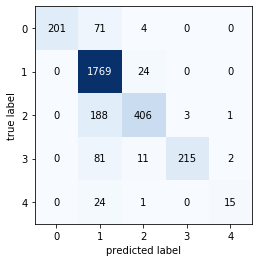

In [60]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_rf))
plt.show()

In [61]:
y_test_b = label_binarize(y_test, classes=[1, 2, 3, 4, 5])
y_pred_b = label_binarize(y_pred_rf, classes=[1, 2, 3, 4, 5])
n_classes = y_test_b.shape[1]

rf_accuracy = metrics.accuracy_score(y_test_b, y_pred_b)

print("Accuracy: ", rf_accuracy)

Accuracy:  0.8640583554376657


In [62]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_b[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

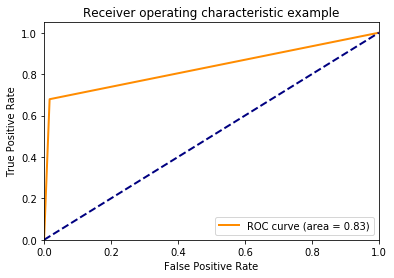

In [63]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

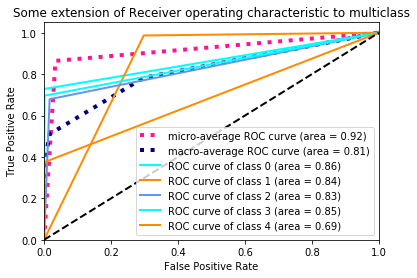

In [64]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [65]:
rf_end = time.strftime("%Y-%m-%d_%H_%M_%S")

In [75]:
print("Start time: ", rf_start)
print("")
print("")
print("**** Random Forest ****")
print("")
print("Best Estimators: ", best_estimators_rf)
print("Accuracy: %.2f" % rf_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_rf, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_rf, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_rf, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_rf)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_rf))
print("Elapsed: %.2f" % (abs(datetime.strptime(rf_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(rf_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))
print("End time: ", rf_end)

Start time:  2022-01-29_16_06_15


**** Random Forest ****

Best Estimators:  300
Accuracy: 0.86
F1 Scode micro: 0.86
F1 Scode macro: 0.77
F1 Scode weighted: 0.86
precision: [1.         0.82934834 0.9103139  0.98623853 0.83333333]
recall: [0.72826087 0.98661461 0.67892977 0.69579288 0.375     ]
fscore: [0.8427673  0.90117168 0.77777778 0.81593928 0.51724138]
support: [ 276 1793  598  309   40]
MEA: 0.18
Elapsed: 7.80
End time:  2022-01-29_16_14_03


## Bagging (Decision Tree Classifier)

In [67]:
bag_dtc_start = time.strftime("%Y-%m-%d_%H_%M_%S")

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 33.4min finished


Best estimators:  350
Best score:  0.8310524153603703
Bagging (Decision Tree Classifier) Accuracy:  0.868368700265252


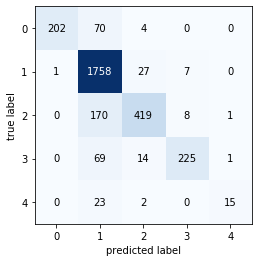

Accuracy:  0.868368700265252


In [68]:
parametres = [{"n_estimators":[100, 150, 200, 250, 300, 350]}]
bag_dtc = BaggingClassifier(DecisionTreeClassifier(), random_state=seed)
grid_bag_dtc = GridSearchCV(cv = 10, estimator=bag_dtc, param_grid=parametres, scoring="accuracy", verbose=1)
grille_bag_dtc = grid_bag_dtc.fit(X_train, y_train)

best_estimators_bag_dtc = grille_bag_dtc.best_params_["n_estimators"]
print("Best estimators: ", best_estimators_bag_dtc)

best_score_bag_dtc = grille_bag_dtc.best_score_
print("Best score: ", best_score_bag_dtc)

bag_dtc = BaggingClassifier(DecisionTreeClassifier(), n_estimators=best_estimators_bag_dtc, random_state=seed)
bag_dtc.fit(X_train,y_train)
y_pred_bag_dtc = bag_dtc.predict(X_test)

bag_dtc_accuracy = metrics.accuracy_score(y_test, y_pred_bag_dtc)

print("Bagging (Decision Tree Classifier) Accuracy: ", bag_dtc_accuracy)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_bag_dtc))
plt.show()

y_pred_b = label_binarize(y_pred_bag_dtc, classes=[1, 2, 3, 4, 5])
n_classes = y_test_b.shape[1]

bag_dtc_accuracy = metrics.accuracy_score(y_test_b, y_pred_b)
print("Accuracy: ", bag_dtc_accuracy)

In [69]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_b[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

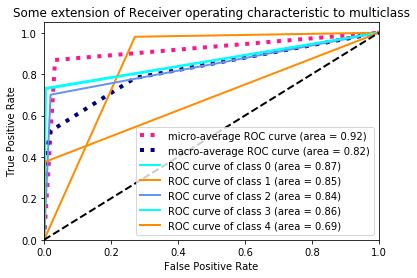

In [70]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [71]:
bag_dtc_end = time.strftime("%Y-%m-%d_%H_%M_%S")

In [72]:
print("Start time: ", bag_dtc_start)
print("")
print("")
print("**** Bagging (Decision Tree Classifier) ****")
print("")
print("Best Estimators: ", best_estimators_bag_dtc)
print("Accuracy: %.2f" % bag_dtc_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_bag_dtc, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_bag_dtc, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_bag_dtc, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_bag_dtc)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_bag_dtc))
print("Elapsed: %.2f" % (abs(datetime.strptime(bag_dtc_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(bag_dtc_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))
print("End time: ", bag_dtc_end)


Start time:  2022-01-29_16_55_05


**** Bagging (Decision Tree Classifier) ****

Best Estimators:  350
Accuracy: 0.87
F1 Scode micro: 0.87
F1 Scode macro: 0.78
F1 Scode weighted: 0.86
precision: [0.99507389 0.84114833 0.89914163 0.9375     0.88235294]
recall: [0.73188406 0.98047964 0.7006689  0.72815534 0.375     ]
fscore: [0.8434238  0.90548545 0.78759398 0.81967213 0.52631579]
support: [ 276 1793  598  309   40]
MEA: 0.17
Elapsed: 35.32
End time:  2022-01-29_16_55_05


## Bagging (K-Nearest Neighbour)

In [76]:
bag_knn_start = time.strftime("%Y-%m-%d_%H_%M_%S")

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 59.8min finished


Best estimators:  250
Best score:  0.6437857660056525
Bagging (KNN) Accuracy:  0.661472148541114


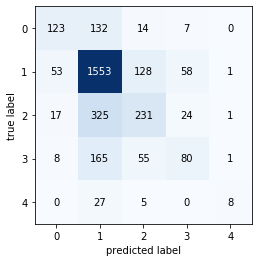

Accuracy:  0.661472148541114


In [77]:
parametres = [{"n_estimators":[100, 150, 200, 250, 300, 350]}]
bag_knn = BaggingClassifier(KNeighborsClassifier(), random_state=seed)
grid_bag_knn = GridSearchCV(cv = 10, estimator=bag_knn, param_grid=parametres, scoring="accuracy", verbose=1)
grille_bag_knn = grid_bag_knn.fit(X_train, y_train)

best_estimators_bag_knn = grille_bag_knn.best_params_["n_estimators"]
print("Best estimators: ", best_estimators_bag_knn)

best_score_bag_knn = grille_bag_knn.best_score_
print("Best score: ", best_score_bag_knn)

bag_knn = BaggingClassifier(KNeighborsClassifier(), n_estimators=best_estimators_bag_knn, random_state=seed)
bag_knn.fit(X_train, y_train)
y_pred_bag_knn = bag_knn.predict(X_test)

bag_knn_accuracy = metrics.accuracy_score(y_test, y_pred_bag_knn)

print("Bagging (KNN) Accuracy: ", bag_knn_accuracy)

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_bag_knn))
plt.show()

y_pred_b = label_binarize(y_pred_bag_knn, classes=[1, 2, 3, 4, 5])
n_classes = y_test_b.shape[1]

bag_knn_accuracy = metrics.accuracy_score(y_test_b, y_pred_b)
print("Accuracy: ", bag_knn_accuracy)

In [78]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_b[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

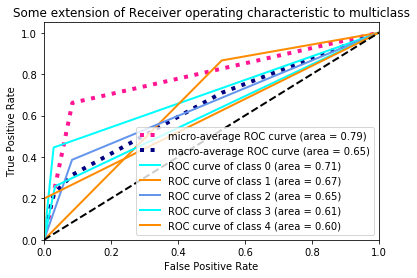

In [79]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [80]:
bag_knn_end = time.strftime("%Y-%m-%d_%H_%M_%S")

In [81]:
print("Start time: ", bag_knn_start)

print("")
print("")
print("**** Bagging (K-Nearest Neighbours) ****")
print("")
print("Best Estimators: ", best_estimators_bag_knn)
print("Accuracy: %.2f" % bag_knn_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_bag_knn, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_bag_knn, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_bag_knn, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_bag_knn)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_bag_knn))
print("Elapsed: %.2f" % (abs(datetime.strptime(bag_knn_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(bag_knn_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))
print("End time: ", bag_knn_end)


Start time:  2022-01-29_17_03_06


**** Bagging (K-Nearest Neighbours) ****

Best Estimators:  250
Accuracy: 0.66
F1 Scode micro: 0.66
F1 Scode macro: 0.48
F1 Scode weighted: 0.64
precision: [0.6119403  0.70526794 0.5334873  0.47337278 0.72727273]
recall: [0.44565217 0.86614612 0.38628763 0.25889968 0.2       ]
fscore: [0.51572327 0.77747184 0.44810863 0.33472803 0.31372549]
support: [ 276 1793  598  309   40]
MEA: 0.45
Elapsed: 62.75
End time:  2022-01-29_18_05_51


## Gradient Boosted Trees

In [82]:
cat_start = time.strftime("%Y-%m-%d_%H_%M_%S")

In [83]:
X_display = df_training_videos_num_i.drop('bias_num', axis = 1)
y_display = df_training_videos_num_i['bias_num'].to_numpy()

In [84]:
# create a train/test split with catboost
d_test_cat = cat.Pool(X_test, y_test)

In [85]:
model_cat = cat.CatBoostClassifier(iterations = 5000
                                   , learning_rate = 0.01
                                   , loss_function = "MultiClass"
                                   , random_seed = seed
#                                   , depth = 8)
                                   , depth = 4)

model_cat.fit(X_train
                , y_train
                , eval_set = d_test_cat
                , verbose_eval=500
                , early_stopping_rounds=400
                , plot = True)

y_pred_cat_array = model_cat.predict(X_test)

print("\nTest  Accuracy : %.2f"%model_cat.score(X_test, y_test))
print("Train Accuracy : %.2f"%model_cat.score(X_train, y_train))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.5984100	test: 1.5981450	best: 1.5981450 (0)	total: 66.8ms	remaining: 5m 33s
500:	learn: 0.9605505	test: 0.9634159	best: 0.9634159 (500)	total: 5.59s	remaining: 50.2s
1000:	learn: 0.9024192	test: 0.9207801	best: 0.9207801 (1000)	total: 11.3s	remaining: 45.2s
1500:	learn: 0.8583624	test: 0.8918872	best: 0.8918872 (1500)	total: 17s	remaining: 39.7s
2000:	learn: 0.8256013	test: 0.8726272	best: 0.8726272 (2000)	total: 23.9s	remaining: 35.9s
2500:	learn: 0.7978388	test: 0.8571430	best: 0.8571430 (2500)	total: 30.3s	remaining: 30.3s
3000:	learn: 0.7729692	test: 0.8440381	best: 0.8440381 (3000)	total: 36.7s	remaining: 24.4s
3500:	learn: 0.7503541	test: 0.8324580	best: 0.8324544 (3499)	total: 43.8s	remaining: 18.7s
4000:	learn: 0.7301278	test: 0.8224426	best: 0.8224426 (4000)	total: 51.2s	remaining: 12.8s
4500:	learn: 0.7111622	test: 0.8135347	best: 0.8135347 (4500)	total: 58.5s	remaining: 6.48s
4999:	learn: 0.6933047	test: 0.8046683	best: 0.8046683 (4999)	total: 1m 5s	remaining: 0u

In [86]:
y_pred_cat = []
for i in range(len(y_pred_cat_array)):
    y_pred_cat.append(y_pred_cat_array[i][0])
y_pred_cat = np.asarray(y_pred_cat)

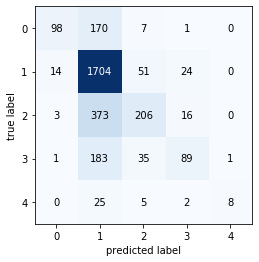

In [87]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_cat))
plt.show()

In [88]:
y_pred_b = label_binarize(y_pred_cat, classes=[1, 2, 3, 4, 5])
n_classes = y_test_b.shape[1]

cat_accuracy = metrics.accuracy_score(y_test_b, y_pred_b)

print("Accuracy: ", cat_accuracy)

Accuracy:  0.6979442970822282


In [89]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_b[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

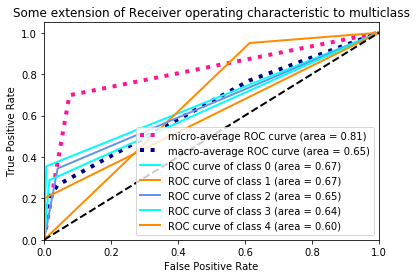

In [90]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [91]:
#file_name = "model/catboost_0" + date + ".cat"
#with open(file_name, 'wb') as fid:
    #cPickle.dump(bag, fid)

In [92]:
cat_end = time.strftime("%Y-%m-%d_%H_%M_%S")

In [93]:
print("Start time: ", cat_start)

print("")
print("")
print("**** Catboost ****")
print("")
print("Accuracy: %.2f" % cat_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_cat, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_cat, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_cat, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_cat)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_cat))
print("Elapsed: %.2f" % (abs(datetime.strptime(cat_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(cat_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))
print("End time: ", cat_end)


Start time:  2022-01-29_18_18_37


**** Catboost ****

Accuracy: 0.70
F1 Scode micro: 0.70
F1 Scode macro: 0.50
F1 Scode weighted: 0.66
precision: [0.84482759 0.69409369 0.67763158 0.67424242 0.88888889]
recall: [0.35507246 0.95036252 0.34448161 0.28802589 0.2       ]
fscore: [0.5        0.80225989 0.45676275 0.40362812 0.32653061]
support: [ 276 1793  598  309   40]
MEA: 0.39
Elapsed: 1.17
End time:  2022-01-29_18_19_47


El método **CatBoost** se detiene luego de 500 iteraciones al detectar posible overfitting, reprotando un error observado de 55% correspondiente a la iteración 390.

Además se probó una profundidad máxima de 4, arrojando el mismo error, llegando al resultado en 1247 iteraciones. También se probaron varios learning rate (0.02, 0.05, 0.001) con 4 de profundidad, obteninedo prácticamente el mismo error, con la notable diferencia de learning_rate de 0.001 que subía casi dos puntos.

Se conserva el modelo con depth=8 y learning_rate=0.01 como final.

## XGBoost

In [26]:
xgb_start = time.strftime("%Y-%m-%d_%H_%M_%S")

In [27]:
# create a train/test split with xgboost
d_train_xgb = xgb.DMatrix(X_train, label=y_train)
d_test_xgb = xgb.DMatrix(X_test, label=y_test)

In [28]:
params = {
    "learning_rate": 0.01,
    "objective": "multi:softmax",
    "num_class": 6,
    "eval_metric": "mlogloss",
    "max_depth": 4,
    "max_leaves": 4
}

model_xgb = xgb.train(params
                        , d_train_xgb
                        , 40000
                        , evals = [(d_test_xgb, "Test")]
                        , verbose_eval=1000
                        , early_stopping_rounds=1000)

y_pred_xgb_array = model_xgb.predict(d_test_xgb)
y_train_xgb_array = model_xgb.predict(d_train_xgb)



[0]	Test-mlogloss:1.78079
[1000]	Test-mlogloss:0.84589
[2000]	Test-mlogloss:0.78906
[3000]	Test-mlogloss:0.74264
[4000]	Test-mlogloss:0.70623
[5000]	Test-mlogloss:0.67558
[6000]	Test-mlogloss:0.65115
[7000]	Test-mlogloss:0.62986
[8000]	Test-mlogloss:0.61062
[9000]	Test-mlogloss:0.59478
[10000]	Test-mlogloss:0.57880
[11000]	Test-mlogloss:0.56709
[12000]	Test-mlogloss:0.55654
[13000]	Test-mlogloss:0.54948
[14000]	Test-mlogloss:0.54304
[15000]	Test-mlogloss:0.53832
[16000]	Test-mlogloss:0.53517
[17000]	Test-mlogloss:0.53333
[18000]	Test-mlogloss:0.53180
[19000]	Test-mlogloss:0.53234
[19212]	Test-mlogloss:0.53197


In [29]:
y_train_xgb_array = model_xgb.predict(d_train_xgb)

In [30]:
print("\nTest  Accuracy : %.2f"%accuracy_score(y_test, y_pred_xgb_array))
print("Train Accuracy : %.2f"%accuracy_score(y_train, y_train_xgb_array))

print("\nClassification Report : ")
print(classification_report(y_test, y_pred_xgb_array))


Test  Accuracy : 0.84
Train Accuracy : 1.00

Classification Report : 
              precision    recall  f1-score   support

           1       0.95      0.70      0.80       276
           2       0.84      0.95      0.89      1793
           3       0.80      0.69      0.74       598
           4       0.91      0.66      0.76       309
           5       0.88      0.55      0.68        40

    accuracy                           0.84      3016
   macro avg       0.88      0.71      0.78      3016
weighted avg       0.85      0.84      0.84      3016



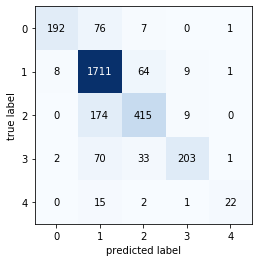

In [31]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred_xgb_array))
plt.show()

In [34]:
y_pred_xgb_array_b = label_binarize(y_pred_xgb_array, classes=[1, 2, 3, 4, 5])
n_classes = y_test_b.shape[1]

xgb_accuracy = metrics.accuracy_score(y_test_b, y_pred_xgb_array_b)

print("Accuracy: ", xgb_accuracy)

Accuracy:  0.8431697612732095


In [35]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_b[:, i], y_pred_xgb_array_b[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_b.ravel(), y_pred_xgb_array_b.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

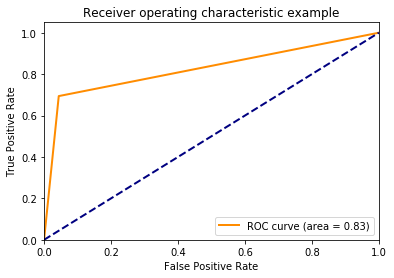

In [38]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

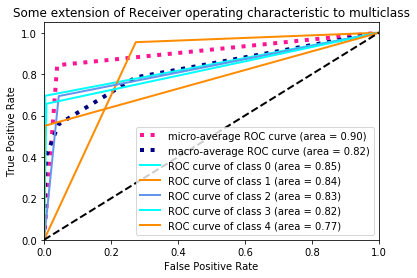

In [39]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

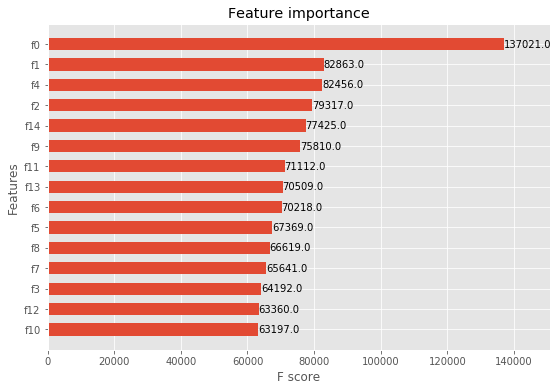

In [42]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111)
    xgb.plotting.plot_importance(model_xgb, ax=ax, height=0.6, importance_type="weight")

In [43]:
xgb_end = time.strftime("%Y-%m-%d_%H_%M_%S")

In [44]:
print("")
print("")
print("**** XGBoost ****")
print("")
print("Accuracy: %.2f" % xgb_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_xgb_array, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_xgb_array, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_xgb_array, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_xgb_array)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))#

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_xgb_array))
print("Elapsed: %.2f" % (abs(datetime.strptime(xgb_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(xgb_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))
print("")
print("")
print("End time: ", xgb_end)



**** XGBoost ****

Accuracy: 0.84
F1 Scode micro: 0.84
F1 Scode macro: 0.78
F1 Scode weighted: 0.84
precision: [0.95049505 0.83626588 0.79654511 0.91441441 0.88      ]
recall: [0.69565217 0.95426659 0.69397993 0.65695793 0.55      ]
fscore: [0.80334728 0.89137796 0.74173369 0.7645951  0.67692308]
support: [ 276 1793  598  309   40]
MEA: 0.20
Elapsed: 87.32


End time:  2022-01-29_23_16_10


## Metrics Summary

In [40]:
print("Start time: ", gnb_start)

print("")
print("")
print("**** Gaussian Naive Bayes ****")
print("")
print("Accuracy: %.2f" % gnb_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_gnb, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_gnb, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_gnb, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_gnb)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_gnb))
print("Elapsed: %.2f" % (abs(datetime.strptime(gnb_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(gnb_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))


print("")
print("")
print("**** KNN ****")
print("")
print("Best Estimators: ", best_estimators_knn)
print("Accuracy: %.2f" % knn_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_knn, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_knn, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_knn, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_knn)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_knn))
print("Elapsed: %.2f" % (abs(datetime.strptime(knn_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(knn_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))

print("")
print("")
print("**** Random Forest ****")
print("")
print("Best Estimators: ", best_estimators_rf)
print("Accuracy: %.2f" % rf_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_rf, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_rf, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_rf, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_rf)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_rf))
print("Elapsed: %.2f" % (abs(datetime.strptime(rf_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(rf_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))

print("")
print("")
print("**** Bagging (Decision Tree Classifier) ****")
print("")
print("Best Estimators: ", best_estimators_bag_dtc)
print("Accuracy: %.2f" % bag_dtc_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_bag_dtc, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_bag_dtc, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_bag_dtc, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_bag_dtc)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_bag_dtc))
print("Elapsed: %.2f" % (abs(datetime.strptime(bag_dtc_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(bag_dtc_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))

print("")
print("")
print("**** Bagging (K-Nearest Neighbours) ****")
print("")
print("Best Estimators: ", best_estimators_bag_knn)
print("Accuracy: %.2f" % bag_knn_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_bag_knn, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_bag_knn, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_bag_knn, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_bag_knn)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_bag_knn))
print("Elapsed: %.2f" % (abs(datetime.strptime(bag_knn_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(bag_knn_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))

print("")
print("")
print("**** Catboost ****")
print("")
print("Accuracy: %.2f" % cat_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_cat, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_cat, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_cat, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_cat)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_cat))
print("Elapsed: %.2f" % (abs(datetime.strptime(cat_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(cat_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))

print("")
print("")
print("**** XGBoost ****")
print("")
print("Accuracy: %.2f" % xgb_accuracy)
print("F1 Scode ""micro"": %.2f" % f1_score(y_test, y_pred_xgb_array, average="micro"))
print("F1 Scode ""macro"": %.2f" % f1_score(y_test, y_pred_xgb_array, average="macro"))
print("F1 Scode ""weighted"": %.2f" % f1_score(y_test, y_pred_xgb_array, average="weighted"))

precision, recall, fscore, support = score(y_test, y_pred_xgb_array)

print("precision: {}".format(precision))
print("recall: {}".format(recall))
print("fscore: {}".format(fscore))
print("support: {}".format(support))#

print("MEA: %.2f" % mean_absolute_error(y_test, y_pred_xgb_array))
print("Elapsed: %.2f" % (abs(datetime.strptime(xgb_end, "%Y-%m-%d_%H_%M_%S") - datetime.strptime(xgb_start, "%Y-%m-%d_%H_%M_%S")).seconds / 60))
print("")
print("")
print("End time: ", xgb_end)

NameError: name 'gnb_start' is not defined

# Classifying Unique Videos Dataset

In [97]:
#df_unique_videos = pd.read_csv("./model/unique_videos_attributes2022-01-16_09_59_01.csv")
df_unique_videos = pd.read_csv("./model/unique_videos_attributes_and_model_inputs2022-01-15_16_09_11.csv")
print("Number of records (unique set):", len(df_unique_videos))
df_unique_videos.head()

Number of records (unique set): 56424


,video,duration,view_count,width,height,channel_id,channel_title,published_time,status,length,...,nrc_el_anger_pct,nrc_el_anticipation_pct,nrc_el_disgust_pct,nrc_el_fear_pct,nrc_el_joy_pct,nrc_el_negative_pct,nrc_el_positive_pct,nrc_el_sadness_pct,nrc_el_surprise_pct,nrc_el_trust_pct
0,kisC2LWRnAE,4:37,0,0,0,UCaXkIU1QidjPwiAYu6GcHjg,MSNBC,2 weeks ago,Success,660.0,...,0.099291,0.078014,0.056738,0.120567,0.056738,0.212766,0.163121,0.070922,0.028369,0.113475
1,7T9D4Eqs2Jk,2:48,0,0,0,UCaXkIU1QidjPwiAYu6GcHjg,MSNBC,1 day ago,Success,412.0,...,0.083333,0.068182,0.030303,0.113636,0.075758,0.136364,0.204545,0.098485,0.060606,0.128788
2,Sl_bKxcJOSk,9:07,0,0,0,UCaXkIU1QidjPwiAYu6GcHjg,MSNBC,1 day ago,Success,1568.0,...,0.090909,0.055718,0.026393,0.061584,0.052786,0.117302,0.199413,0.073314,0.149560,0.173021
3,9LoKfCbxVDE,10:16,0,0,0,UCaXkIU1QidjPwiAYu6GcHjg,MSNBC,1 day ago,Success,1815.0,...,0.117978,0.075843,0.030899,0.089888,0.053371,0.154494,0.205056,0.058989,0.070225,0.143258
4,0W9OYSuyB3k,5:44,0,0,0,UCaXkIU1QidjPwiAYu6GcHjg,MSNBC,1 day ago,Success,971.0,...,0.078341,0.119816,0.018433,0.064516,0.064516,0.147465,0.216590,0.041475,0.115207,0.133641


In [98]:
df_unique_videos.loc[df_unique_videos["bias"]=="L", "bias_num"] = 1
df_unique_videos.loc[df_unique_videos["bias"]=="LC", "bias_num"] = 2
df_unique_videos.loc[df_unique_videos["bias"]=="C", "bias_num"] = 3
df_unique_videos.loc[df_unique_videos["bias"]=="RC", "bias_num"] = 4
df_unique_videos.loc[df_unique_videos["bias"]=="R", "bias_num"] = 5

In [99]:
df_unique_videos["lsd_count"] = df_unique_videos["lsd_negative"] + df_unique_videos["lsd_positive"]
df_unique_videos["lsd_pct"] = df_unique_videos["lsd_count"] / df_unique_videos["length"]

df_unique_videos["afinn_count"] = df_unique_videos["afinn_negative"] + df_unique_videos["afinn_positive"]
df_unique_videos["afinn_pct"] = df_unique_videos["afinn_count"] / df_unique_videos["length"]

df_unique_videos["geninqposneg_count"] = df_unique_videos["geninqposneg_negative"] + df_unique_videos["geninqposneg_positive"]
df_unique_videos["geninqposneg_pct"] = df_unique_videos["geninqposneg_count"] / df_unique_videos["length"]

df_unique_videos["huliu_count"] = df_unique_videos["huliu_negative"] + df_unique_videos["huliu_positive"]
df_unique_videos["huliu_pct"] = df_unique_videos["huliu_count"] / df_unique_videos["length"]

df_unique_videos["lm_count"] = df_unique_videos["lm_negative"] + df_unique_videos["lm_positive"] + df_unique_videos["lm_uncertainty"] + df_unique_videos["lm_litigious"] + df_unique_videos["lm_constraining"] + df_unique_videos["lm_superfluous"] + df_unique_videos["lm_interesting"] + df_unique_videos["lm_modal_words_strong"]
df_unique_videos["lm_pct"] = df_unique_videos["lm_count"] / df_unique_videos["length"]

df_unique_videos.loc[df_unique_videos["lm_count"] == 0, "lm_negative_pct"] = 0
df_unique_videos.loc[df_unique_videos["lm_count"] == 0, "lm_positive_pct"] = 0
df_unique_videos.loc[df_unique_videos["lm_count"] == 0, "lm_uncertainty_pct"] = 0
df_unique_videos.loc[df_unique_videos["lm_count"] == 0, "lm_litigious_pct"] = 0
df_unique_videos.loc[df_unique_videos["lm_count"] == 0, "lm_constraining_pct"] = 0
df_unique_videos.loc[df_unique_videos["lm_count"] == 0, "lm_superfluous_pct"] = 0
df_unique_videos.loc[df_unique_videos["lm_count"] == 0, "lm_interesting_pct"] = 0
df_unique_videos.loc[df_unique_videos["lm_count"] == 0, "lm_modal_words_strong_pct"] = 0

df_unique_videos.loc[df_unique_videos["lm_count"] > 0, "lm_negative_pct"] = df_unique_videos["lm_negative"] / df_unique_videos["lm_count"]
df_unique_videos.loc[df_unique_videos["lm_count"] > 0, "lm_positive_pct"] = df_unique_videos["lm_positive"] / df_unique_videos["lm_count"]
df_unique_videos.loc[df_unique_videos["lm_count"] > 0, "lm_uncertainty_pct"] = df_unique_videos["lm_uncertainty"] / df_unique_videos["lm_count"]
df_unique_videos.loc[df_unique_videos["lm_count"] > 0, "lm_litigious_pct"] = df_unique_videos["lm_litigious"] / df_unique_videos["lm_count"]
df_unique_videos.loc[df_unique_videos["lm_count"] > 0, "lm_constraining_pct"] = df_unique_videos["lm_constraining"] / df_unique_videos["lm_count"]
df_unique_videos.loc[df_unique_videos["lm_count"] > 0, "lm_superfluous_pct"] = df_unique_videos["lm_superfluous"] / df_unique_videos["lm_count"]
df_unique_videos.loc[df_unique_videos["lm_count"] > 0, "lm_interesting_pct"] = df_unique_videos["lm_interesting"] / df_unique_videos["lm_count"]
df_unique_videos.loc[df_unique_videos["lm_count"] > 0, "lm_modal_words_strong_pct"] = df_unique_videos["lm_modal_words_strong"] / df_unique_videos["lm_count"]

df_unique_videos["lgpp_count"] = df_unique_videos["lgpp_culture"] + df_unique_videos["lgpp_economy"] + df_unique_videos["lgpp_environment"] + df_unique_videos["lgpp_groups"] + df_unique_videos["lgpp_institutions"] + df_unique_videos["lgpp_law_and_order"] + df_unique_videos["lgpp_rural"] + df_unique_videos["lgpp_urban"] + df_unique_videos["lgpp_values"]
df_unique_videos["lgpp_pct"] = df_unique_videos["lgpp_count"] / df_unique_videos["length"]

df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_culture_pct"] = 0
df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_economy_pct"] = 0
df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_environment_pct"] = 0
df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_groups_pct"] = 0
df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_institutions_pct"] = 0
df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_law_and_order_pct"] = 0
df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_rural_pct"] = 0
df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_urban_pct"] = 0
df_unique_videos.loc[df_unique_videos["lgpp_count"] == 0, "lgpp_values_pct"] = 0

df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_culture_pct"] = df_unique_videos["lgpp_culture"] / df_unique_videos["lgpp_count"]
df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_economy_pct"] = df_unique_videos["lgpp_economy"] / df_unique_videos["lgpp_count"]
df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_environment_pct"] = df_unique_videos["lgpp_environment"] / df_unique_videos["lgpp_count"]
df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_groups_pct"] = df_unique_videos["lgpp_groups"] / df_unique_videos["lgpp_count"]
df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_institutions_pct"] = df_unique_videos["lgpp_institutions"] / df_unique_videos["lgpp_count"]
df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_law_and_order_pct"] = df_unique_videos["lgpp_law_and_order"] / df_unique_videos["lgpp_count"]
df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_rural_pct"] = df_unique_videos["lgpp_rural"] / df_unique_videos["lgpp_count"]
df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_urban_pct"] = df_unique_videos["lgpp_urban"] / df_unique_videos["lgpp_count"]
df_unique_videos.loc[df_unique_videos["lgpp_count"] > 0, "lgpp_values_pct"] = df_unique_videos["lgpp_values"] / df_unique_videos["lgpp_count"]

df_unique_videos["nrc_el_count"] = df_unique_videos["nrc_el_anger"] + df_unique_videos["nrc_el_anticipation"] + df_unique_videos["nrc_el_disgust"] + df_unique_videos["nrc_el_fear"] + df_unique_videos["nrc_el_joy"] + df_unique_videos["nrc_el_negative"] + df_unique_videos["nrc_el_positive"] + df_unique_videos["nrc_el_sadness"] + df_unique_videos["nrc_el_surprise"] + df_unique_videos["nrc_el_trust"]
df_unique_videos["nrc_el_pct"] = df_unique_videos["nrc_el_count"] / df_unique_videos["length"]

df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_anger_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_anticipation_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_disgust_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_fear_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_joy_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_negative_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_positive_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_sadness_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_surprise_pct"] = 0
df_unique_videos.loc[df_unique_videos["nrc_el_count"] == 0, "nrc_el_trust_pct"] = 0

df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_anger_pct"] = df_unique_videos["nrc_el_anger"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_anticipation_pct"] = df_unique_videos["nrc_el_anticipation"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_disgust_pct"] = df_unique_videos["nrc_el_disgust"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_fear_pct"] = df_unique_videos["nrc_el_fear"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_joy_pct"] = df_unique_videos["nrc_el_joy"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_negative_pct"] = df_unique_videos["nrc_el_negative"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_positive_pct"] = df_unique_videos["nrc_el_positive"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_sadness_pct"] = df_unique_videos["nrc_el_sadness"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_surprise_pct"] = df_unique_videos["nrc_el_surprise"] / df_unique_videos["nrc_el_count"]
df_unique_videos.loc[df_unique_videos["nrc_el_count"] > 0, "nrc_el_trust_pct"] = df_unique_videos["nrc_el_trust"] / df_unique_videos["nrc_el_count"]

In [100]:
df_unique_videos = df_unique_videos[df_unique_videos["length"] > 0]
df_unique_videos.dropna(subset=["Flesch"], inplace=True)

In [101]:
df_unique_videos_att = df_unique_videos[df_unique_videos.columns[60:]]
feature_drop = ["bias", "ARI", "Flesch.Kincaid", "afinn_count", "geninqposneg_count", "huliu_count", "lm_count", "lgpp_count", "nrc_el_count", "lgpp_pct", "huliu_pct", "afinn_pct", "geninqposneg_pct"]

#df_unique_videos_att = df_unique_videos_att.drop(feature_drop, axis = 1).fillna(0)
df_unique_videos_att = df_unique_videos_att.drop(feature_drop, axis = 1)

bias_col = df_unique_videos_att.pop("bias_num")
df_unique_videos_att.insert(0, "bias_num", bias_col)

In [102]:
df_unique_videos_att.columns

Index(['bias_num', 'Flesch', 'lsd_count', 'lsd_pct', 'lm_pct',
       'lm_negative_pct', 'lm_positive_pct', 'lm_uncertainty_pct',
       'lm_litigious_pct', 'lm_constraining_pct', 'lm_superfluous_pct',
       'lm_interesting_pct', 'lm_modal_words_strong_pct', 'lgpp_culture_pct',
       'lgpp_economy_pct', 'lgpp_environment_pct', 'lgpp_groups_pct',
       'lgpp_institutions_pct', 'lgpp_law_and_order_pct', 'lgpp_rural_pct',
       'lgpp_urban_pct', 'lgpp_values_pct', 'nrc_el_pct', 'nrc_el_anger_pct',
       'nrc_el_anticipation_pct', 'nrc_el_disgust_pct', 'nrc_el_fear_pct',
       'nrc_el_joy_pct', 'nrc_el_negative_pct', 'nrc_el_positive_pct',
       'nrc_el_sadness_pct', 'nrc_el_surprise_pct', 'nrc_el_trust_pct'],
      dtype='object')

In [103]:
feature_drop = ["lsd_count", "lm_positive_pct", "lgpp_culture_pct", "lgpp_economy_pct", "lgpp_institutions_pct", "lm_modal_words_strong_pct", "lm_uncertainty_pct", "lm_litigious_pct", "lgpp_law_and_order_pct", "lm_constraining_pct", "lgpp_values_pct", "lgpp_environment_pct", "lm_interesting_pct", "lgpp_groups_pct", "lgpp_rural_pct", "lm_superfluous_pct", "lgpp_urban_pct"]
df_unique_videos_att = df_unique_videos_att.drop(feature_drop, axis = 1)
X_unique = df_unique_videos_att.to_numpy()[:, 1:]

X_unique = scaler.transform(X_unique)

y_unique = bag_dtc.predict(X_unique)
new_bias = ["L" if x == 1 else "CL" if x == 2 else "C" if x == 3 else "CR" if x == 4 else "R" for x in y_unique]

In [104]:
df_unique_videos.insert(len(df_unique_videos.columns), "new_bias", new_bias)

In [105]:
date = time.strftime("%Y-%m-%d_%H_%M_%S")
file_name = "model/classified_unique_videos_1" + file_suffix + date + ".csv"
df_unique_videos_att.to_csv(file_name, index=False)

## Merge With Results Dataset

In [106]:
filepaths = ["results/" + f for f in listdir("results/") if f.endswith(".csv")]
df_videos = pd.concat(map(pd.read_csv, filepaths))
print("Retrieved videos:", len(df_videos))

Retrieved videos: 462986


In [107]:
col = df_unique_videos.pop("bias")
df_unique_videos.insert(0, "bias", col)

col = df_unique_videos.pop("channel_id")
df_unique_videos.insert(0, "channel_id", col)

col = df_unique_videos.pop("channel_title")
df_unique_videos.insert(0, "channel_title", col)

col = df_unique_videos.pop("new_bias")
df_unique_videos.insert(0, "new_bias", col)

In [ ]:
df_videos = df_videos.merge(df_unique_videos, on = "video", how = "left")

In [ ]:
df_videos.bias.value_counts().sort_index()

In [ ]:
df_videos.new_bias.value_counts().sort_index()

In [ ]:
file_name = "model/classified_videos_1" + file_suffix + date + ".csv"
df_videos.to_csv(file_name, index=False)